In [160]:
## run notebooks
#%run "../Notebooks/initialization.ipynb"
%run "../Notebooks/Stitching_functions.ipynb"
%run "../Notebooks/Visualization_functions.ipynb"
%run "../Notebooks/Downsampling_and_outliers_functions.ipynb"
%run "../Notebooks/Meshing_functions.ipynb"
%load_ext autoreload

loaded variables: 
myparams, myconfiguration_file
loaded variables: 
myparams, myconfiguration_file
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# THE MODEL

## load solid file in extension 

[Open3D WARNING] Read JSON failed: unable to open file: ./ScreenCamera_2021-01-13-01-16-57.json
[Open3D WARNING] [ViewControl] ConvertFromPinholeCameraParameters() failed because window height and width do not match.
[Open3D WARNING] Read JSON failed: unable to open file: ./RenderOption_2021-01-12-23-23-51.json
[Open3D WARNING] GLFW Error: The GLFW library is not initialized


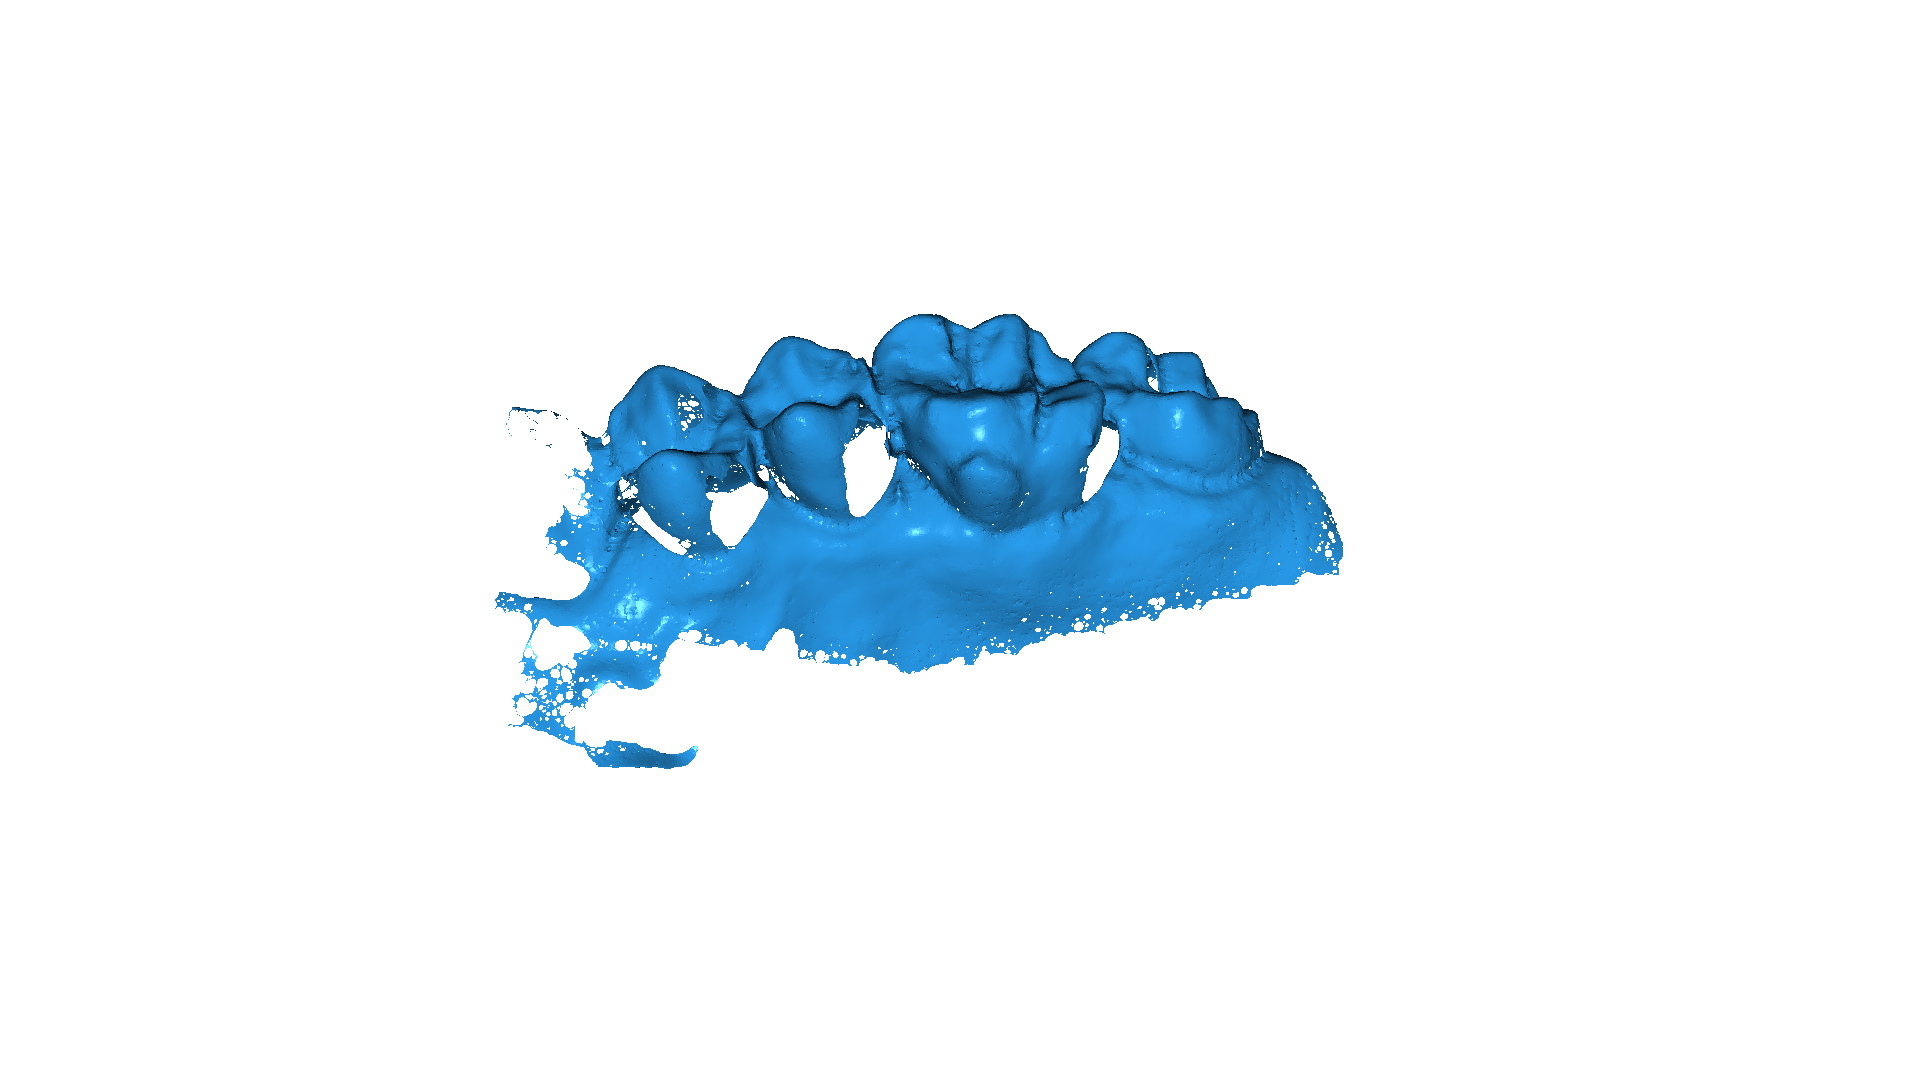

In [31]:
mesh = o3d.io.read_triangle_mesh("dental.stl")
mesh.compute_vertex_normals()
#o3d.visualization.draw_geometries([mesh], mesh_show_back_face=True)
custom_draw_geometry([mesh],
                     mytitle = "original model",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = True)
Im(filename=last_file(".png"),
  width = 500, height = 400) 

## convert it to point cloud

In [3]:
pcd = o3d.geometry.PointCloud()
pcd.points = mesh.vertices
pcd.colors = mesh.vertex_colors
pcd.normals = mesh.vertex_normals

## visualize it 

[Open3D WARNING] GLFW Error: The GLFW library is not initialized


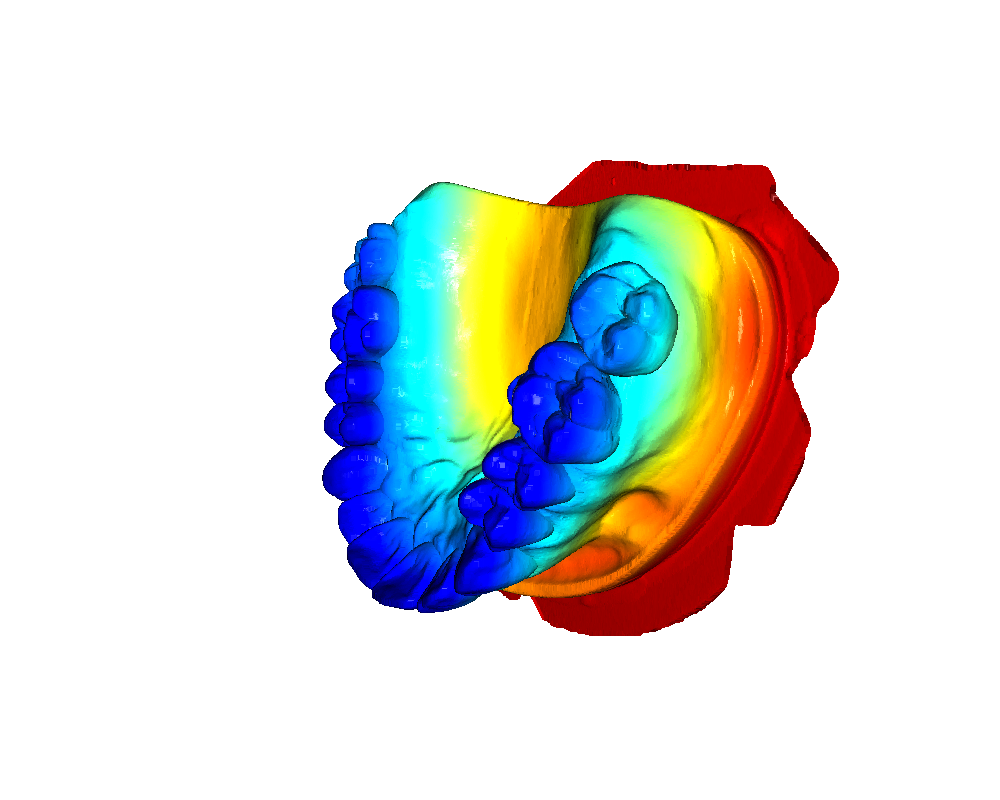

In [4]:
custom_draw_geometry(pcd,
                     mytitle = "original model",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = True)
Im(filename=last_file(".png"),
  width = 500, height = 400) 

In [38]:
pcd.points

std::vector<Eigen::Vector3d> with 3379896 elements.
Use numpy.asarray() to access data.

# OUR RESULTS

we can use either the mesh, which is elaborated, or the last pointcloud after cluster removal.

## mesh as input- load our own best point cloud-with meshing and so on
## TODO
retry with this one too!

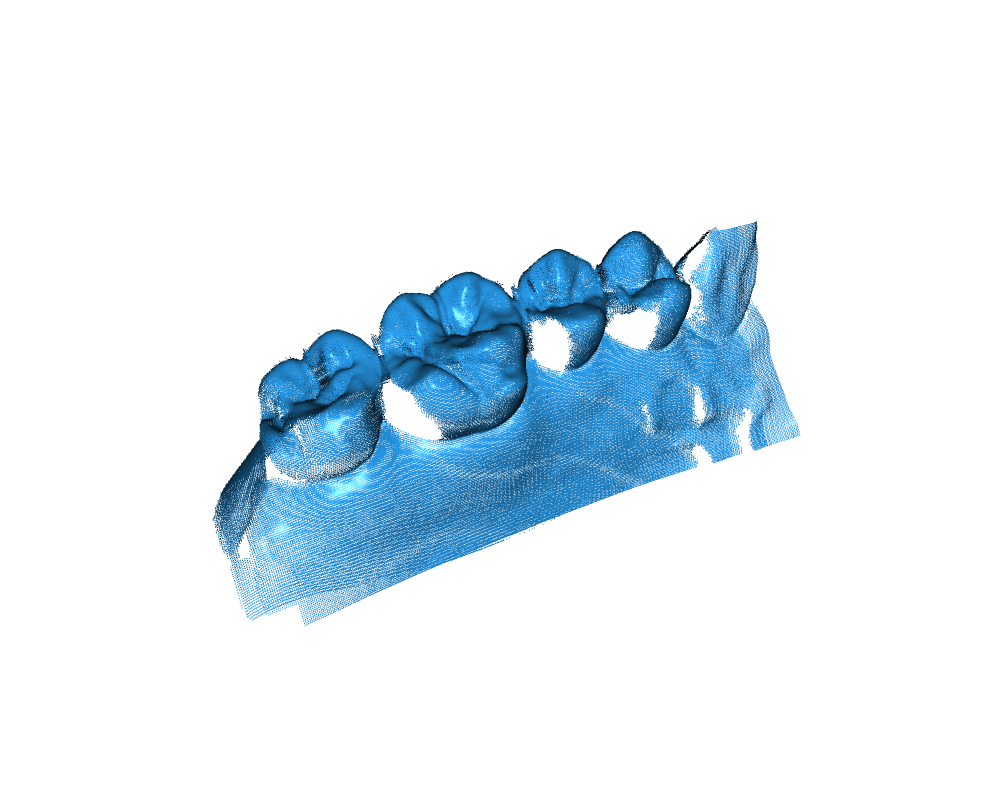

In [178]:
#load point cloud
## TODO load the clean one 
#st_pcd= o3d.io.read_point_cloud("complete_cluster_3.pcd")
aftermesh_st_pcd= o3d.io.read_point_cloud("cropped_6.ply")
custom_draw_geometry(st_pcd,
                     mytitle = "Cropped_6",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False,
                     #onewindow = True
                    )
Im(filename=last_file(".png"),
  width = 500, height = 400) 

## Pointcloud as input -without further enhancements (meshin etc)
DONE

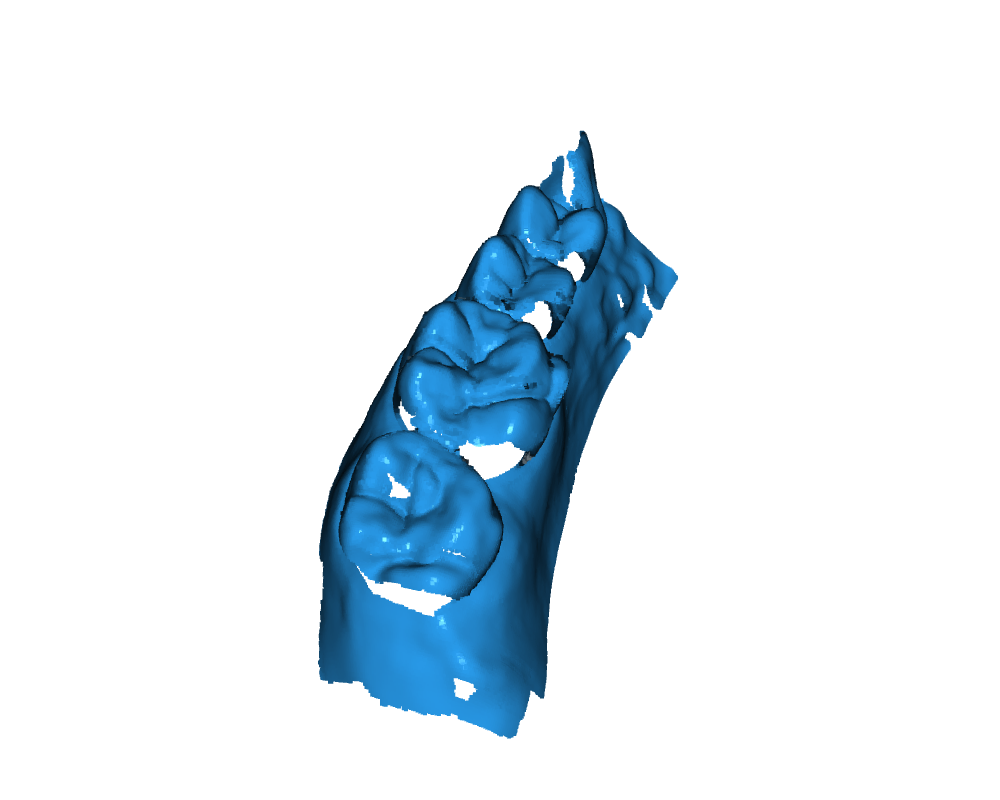

In [173]:
st_pcd= o3d.io.read_point_cloud("complete_cluster_3.pcd")
custom_draw_geometry(st_pcd,
                     mytitle = "complete_cluster_3",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False,
                     #onewindow = True
                    )
Im(filename=last_file(".png"),
  width = 500, height = 400) 

In [100]:
# number of point clouds
st_pcd.points

std::vector<Eigen::Vector3d> with 488502 elements.
Use numpy.asarray() to access data.

## visualization

In [101]:
labels_stitches = ["model_pc","stitched_pc"]
list_stitches = [pcd,st_pcd]
color_stitches = [[1, 0.706, 0],[0, 0.651, 0.929]]
bothpointclouds = list_stitches[0].paint_uniform_color([1, 0.706, 0])+list_stitches[1].paint_uniform_color([0, 0.651, 0.929])

[Open3D WARNING] [ViewControl] ConvertFromPinholeCameraParameters() failed because window height and width do not match.


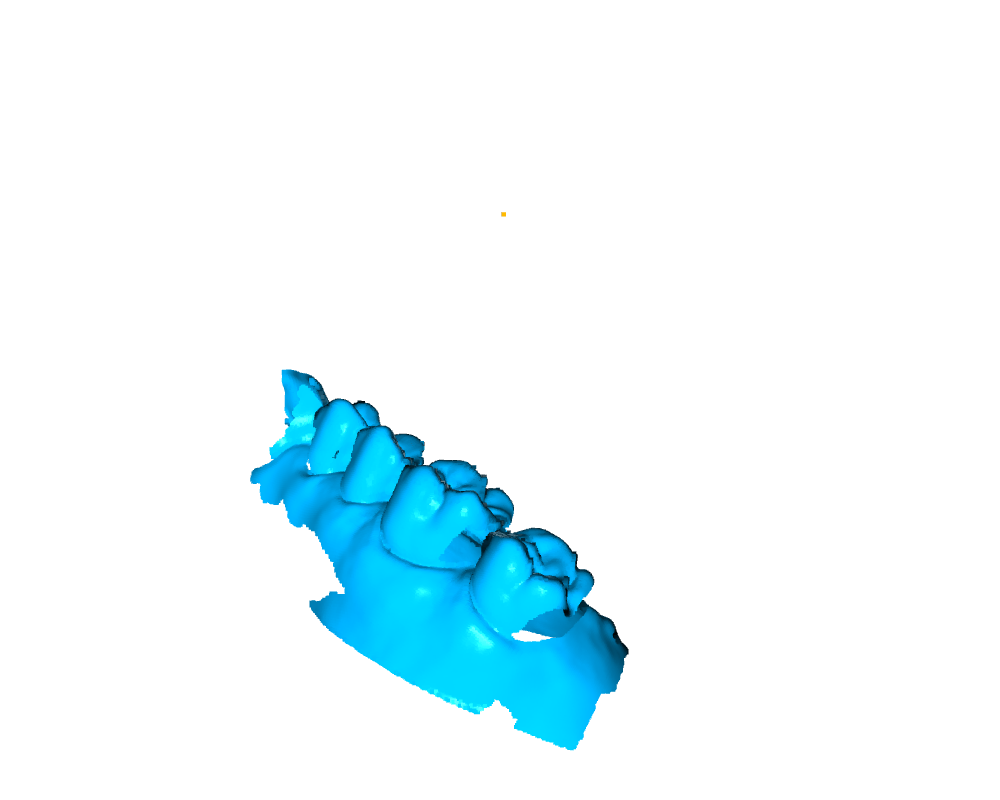

In [102]:
# plot a list of geometries
custom_draw_geometry(bothpointclouds,
                     mytitle = "bothpointclouds",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False,
                     onewindow = True)
Im(filename=last_file(".png"),
  width = 500, height = 400) 

we notice that the scale is out. how to rescale? we need for sure a scaling factor.

## try to apply an ad hoc transformation to rescale

In [135]:
scale_factor = 1000
trans_scale = np.asarray([[scale_factor, 0.0, 0.0, 0.0], 
                            [0.0, scale_factor, 0.0, 0.0],
                            [0.0, 0.0, scale_factor, 0.0], 
                            [0.0, 0.0, 0.0, 1.0]])

In [136]:
temp_pcd = copy.deepcopy(pcd)
temp_pcd.transform(trans_scale)

PointCloud with 3379896 points.

## reduce model

just to have faster computation.... anyhow we dont have the all point cloud reconstruced..

In [140]:
cropped_pcd = crop_save_return(pcd)

Demo for manual geometry cropping
1) Press 'Y' twice to align geometry with negative direction of y-axis
2) Press 'K' to lock screen and to switch to selection mode
3) Drag for rectangle selection,
   or use ctrl + left click for polygon selection
4) Press 'C' to get a selected geometry and to save it
5) Press 'F' to switch to freeview mode
[Open3D INFO] Picked point #894070 (-0.04, -0.022, 0.056) to add in queue.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #514662 (-0.023, -0.03, 0.044) to add in queue.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
./model_cropped_6.ply
./ScreenCapture_2021-01-13-20-58-39.png


./ScreenCapture_2021-01-13-20-58-39.png


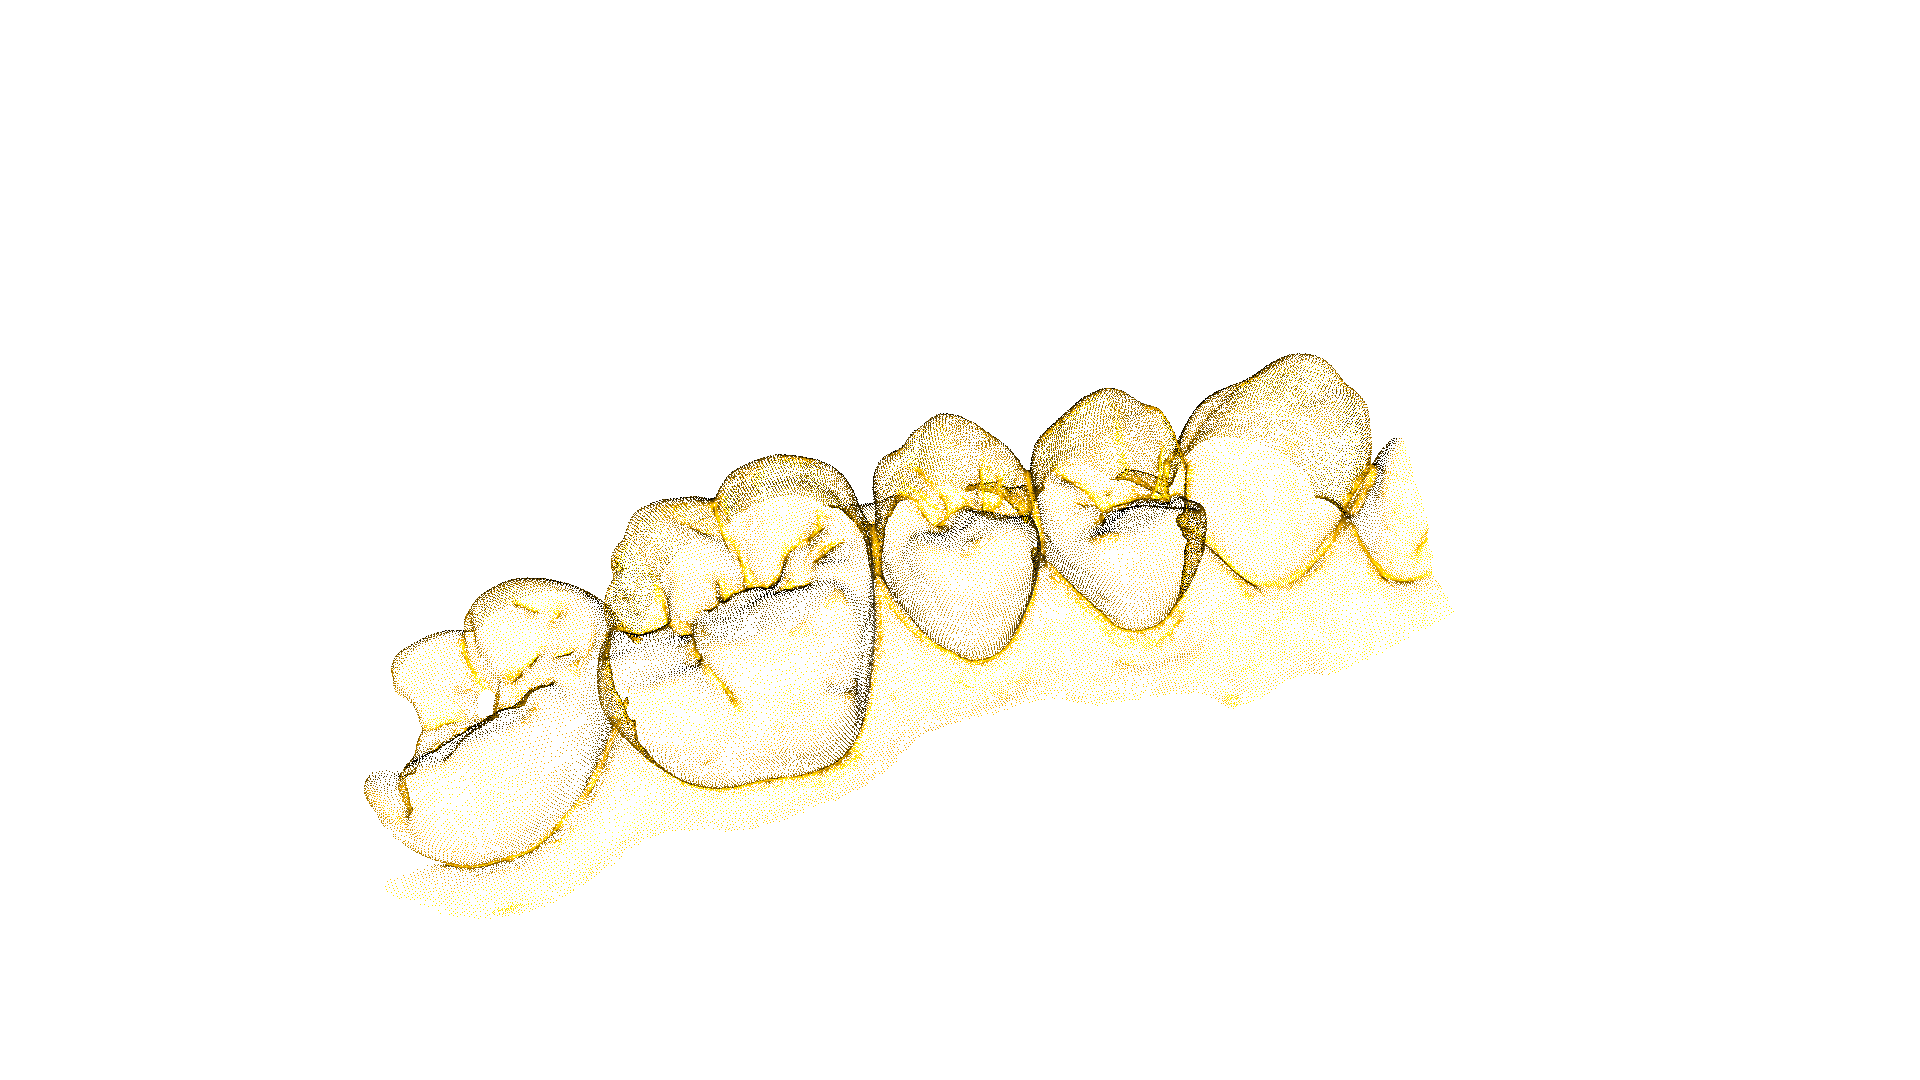

In [141]:
newest = last_file_containing("Screen", extension = '.png')
print (newest)
Im(filename=newest,width = 600) 

In [179]:
# transform again
temp_cropped_pcd = copy.deepcopy(cropped_pcd)
temp_cropped_pcd.transform(trans_scale)

PointCloud with 528615 points.

## heavy downsampling

yes no? how much? for now ad hoc to balance the pointclouds

In [120]:
list_stitches = [temp_cropped_pcd,st_pcd]

In [145]:
#different voxel size, tryig to have them comparable
down_cropped_pcd = temp_cropped_pcd.voxel_down_sample(voxel_size=0.1)
down_st_pcd = st_pcd.voxel_down_sample(voxel_size=0.2)

print (down_cropped_pcd.points)
print (down_st_pcd.points)

downsampled_stitches = [down_cropped_pcd,down_st_pcd]

std::vector<Eigen::Vector3d> with 51851 elements.
Use numpy.asarray() to access data.
std::vector<Eigen::Vector3d> with 39452 elements.
Use numpy.asarray() to access data.


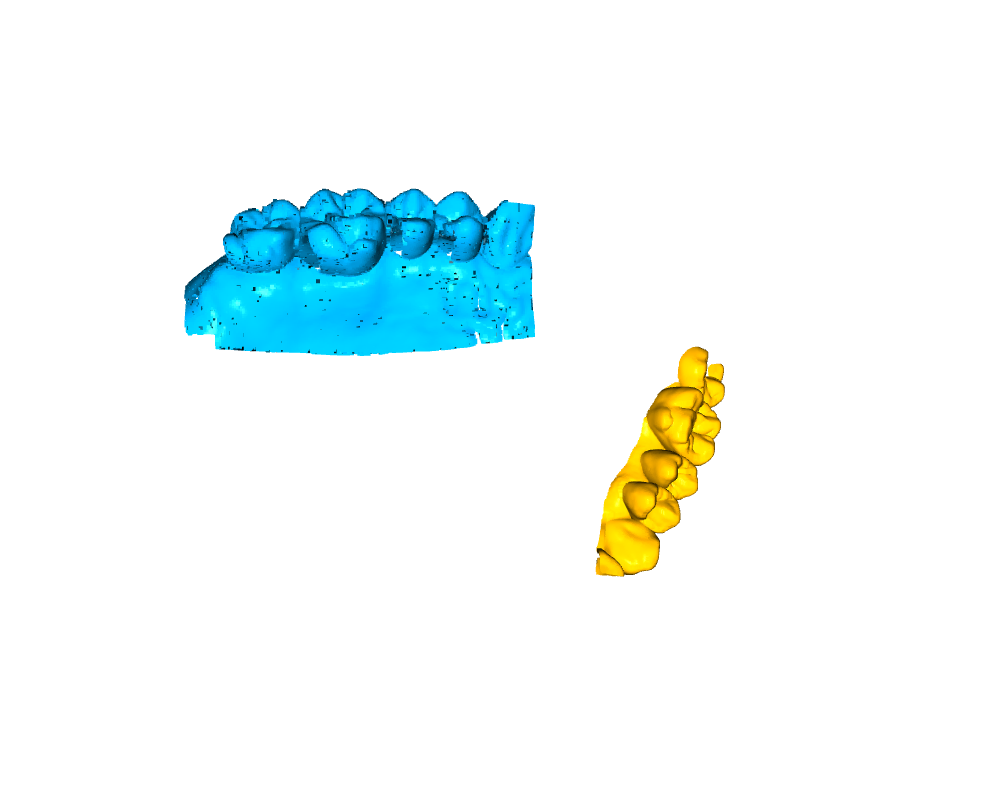

In [146]:
#cropped_pcl = down_cropped_pcd+st_pcd
cropped_pcl =downsampled_stitches[0]+downsampled_stitches[1]
custom_draw_geometry(cropped_pcl,
                     mytitle = "Cropped downsampled both",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False,
                     onewindow = True)
Im(filename=last_file(".png"),
  width = 500, height = 400) 

## attempt to manual registration 

In [157]:
#source = list_stitches[i]
#target = list_stitches[j]

source = downsampled_stitches[i]
target = downsampled_stitches[j]

evaluation_by_manual_registration(source,target,
                         threshold = 0.03
                         )

[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #25232 (-35., -19., 44.) to add in queue.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #44649 (-31., -23., 42.) to add in queue.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #5280 (-27., -29., 42.) to add in queue.

[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #24053

array([[ -0.36535454,   0.92151115,  -0.13165587,  22.15045537],
       [ -0.49072739,  -0.31085269,  -0.81397619,  17.17282328],
       [ -0.79101371,  -0.23278276,   0.5657822 , -13.72684573],
       [  0.        ,   0.        ,   0.        ,   1.        ]])

In [169]:
### good sets of points from previous trials with manual selection
list_picked_id_source = [[25232, 44649, 5280],[47197,11790,9178]]
list_picked_id_target = [[24053,22883,38684],[26226,25403,16180]]

In [168]:
## here either one can feed correspondance points 
## or mark news on the point clouds, only 3 each with shift + left click

transf,picked_id_source,picked_id_target = evaluation_by_manual_registration(source,target,
                                                                             threshold = 0.03,
                                                                             picked_id_source = list_picked_id_source[0],
                                                                             picked_id_target = list_picked_id_target[0]
                                                                            )

[25232, 44649, 5280]
Compute a rough transform using the correspondences given by user
Perform point-to-point ICP refinement



In [170]:
transf

array([[ -0.36535454,   0.92151115,  -0.13165587,  22.15045537],
       [ -0.49072739,  -0.31085269,  -0.81397619,  17.17282328],
       [ -0.79101371,  -0.23278276,   0.5657822 , -13.72684573],
       [  0.        ,   0.        ,   0.        ,   1.        ]])

## result

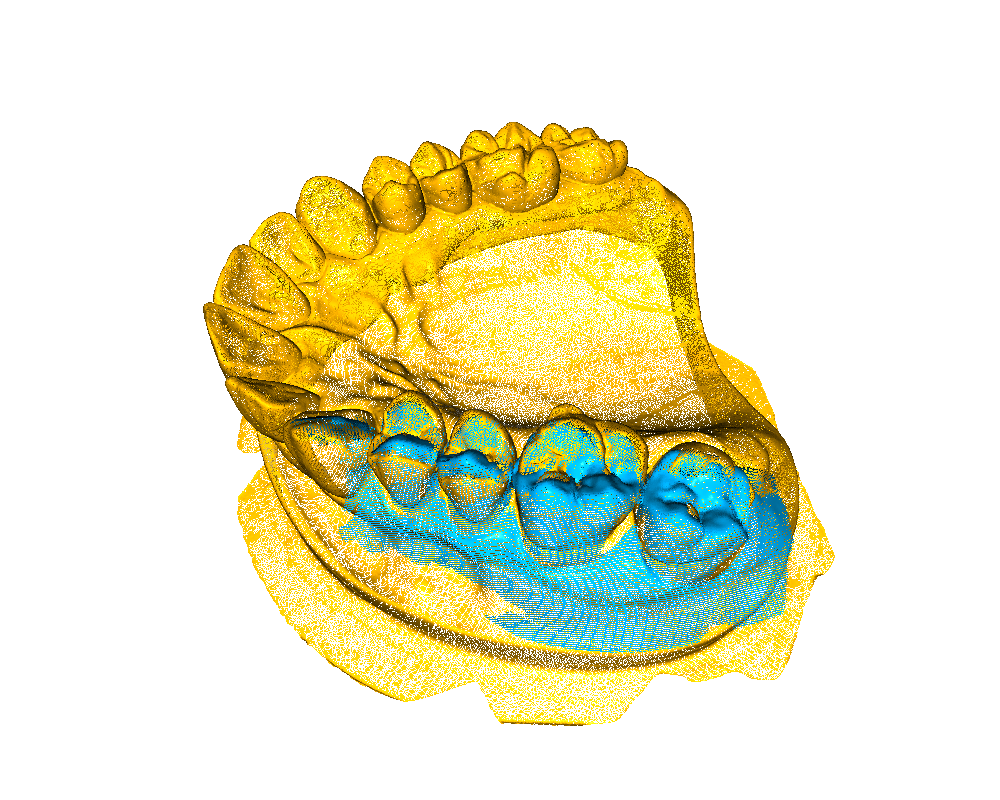

In [176]:
draw_registration_result(temp_pcd, st_pcd, transf)

Im(filename=last_file(".png"),
  width = 500, height = 400) 

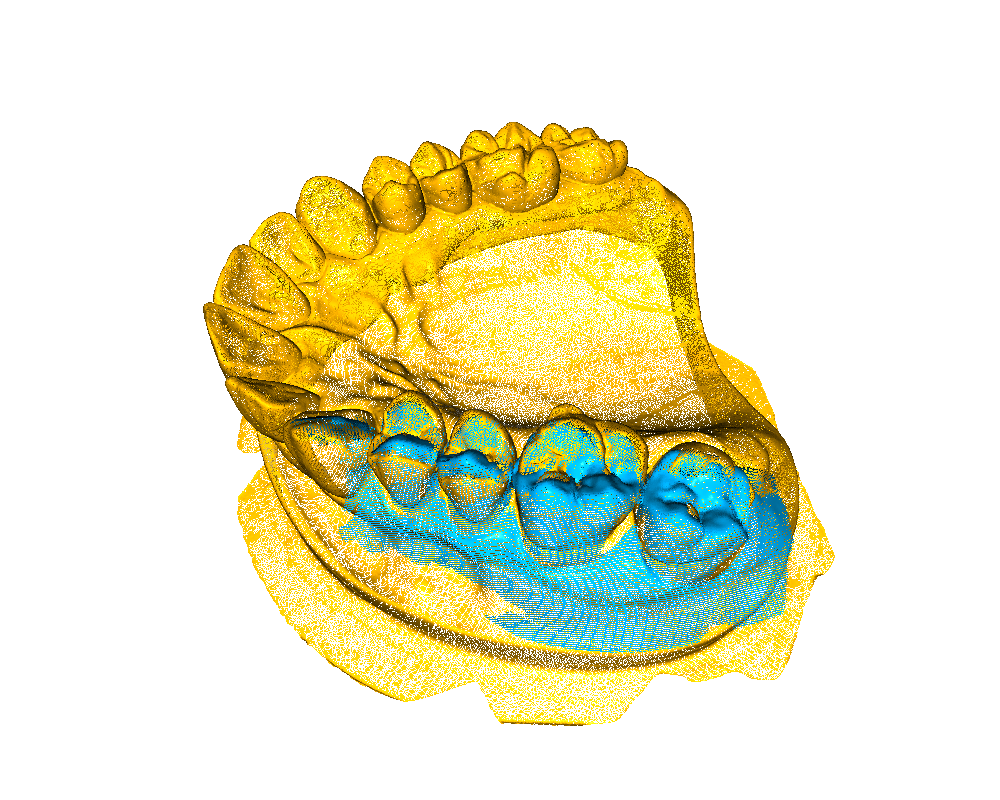

In [182]:
Im(filename=last_file("successfulmanualregistration.png"),
  width = 500, height = 400) 

## Bin

[Open3D INFO] Picked point #47197 (-35., -19., 43.) to add in queue.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #11790 (-31., -24., 42.) to add in queue.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #9178 (-28., -28., 42.) to add in queue.

[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #26226 (12., 4.9, 43.) to add in queue.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #25403 (5.7, 5.7, 40.) to add in queue.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #16180 (0.95, 5.0, 38.) to add in queue.

Compute a rough transform using the correspondences given by user

In [144]:
# timestamp
dt_string = mytimestamp()

# initialize 
voxel_size  =0.2 # with 0.1 doesnt work!
i = 0
j = 1
source_label = labels_stitches[i]
target_label =labels_stitches[j]

source = list_stitches[i]
target = list_stitches[j]

processed_source = downsampled_stitches[i]
processed_target = downsampled_stitches[j]

mytitle= dt_string+"-%s_%s"%(source_label,target_label)
start = timer()

#MAIN
source_output, target_output, transformation_1 = stitch_sequences(processed_source,processed_target,
                                                  source_label,target_label,
                                                  mmax_iteration = 10**7,
                                                  mmax_validation = 0.999,
                                                  print_statements = True, 
                                                  visualization_on = True  
                                                 )

end = timer()
print (f"duration: {end-start}")
draw_registration_result(source_output, target_output, transformation_1, title = dt_string+"Downsampled Registration results")


## apply transformation on original 
draw_registration_result(source, target, transformation_1, title = dt_string+"Full Registration results")

Im(filename=last_file(".png"),
  width = 500, height = 400) 

allpc_downsampled_model_pc_stitched_pc


KeyboardInterrupt: 

## apply custom transformation 

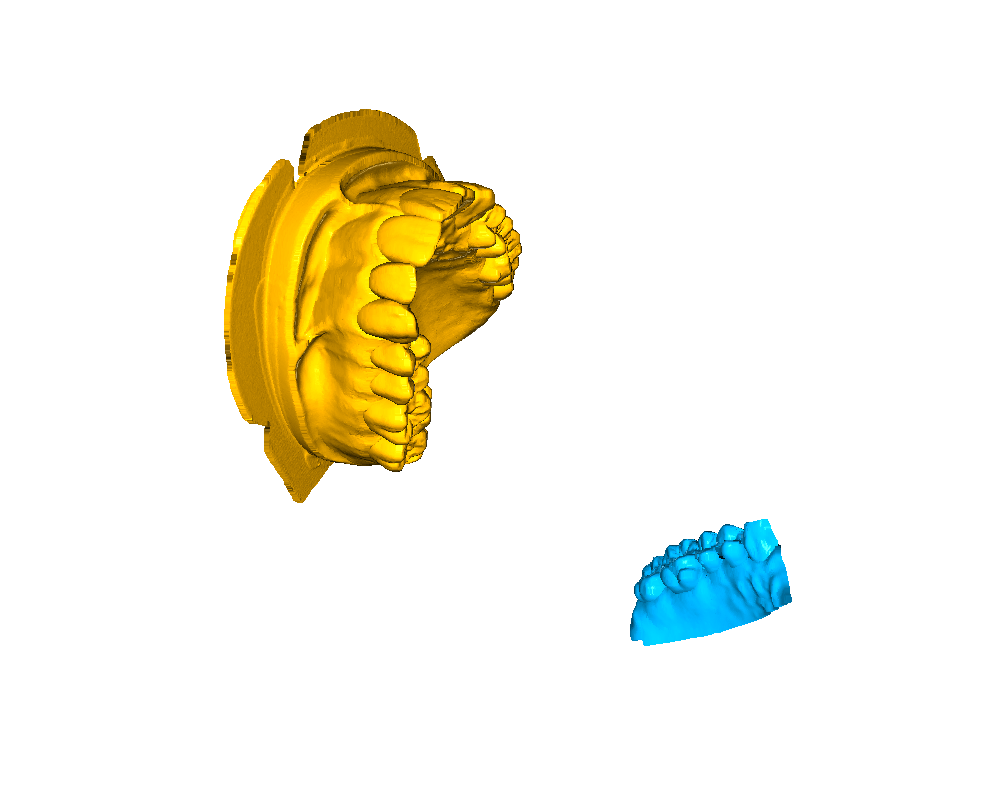

In [28]:
## apply transformation on original 
draw_registration_result(source, target, trasnf_model_to_pc, title = dt_string+"Full Registration results")

Im(filename=last_file(".png"),
  width = 500, height = 400) 

In [27]:
# transformation from the model to the pc

trasnf_model_to_pc = np.array([[ 0.30225325,  0.5357566 ,  0.78842111, -0.06576513],
                           [-0.75569395, -0.36945846,  0.54076528, -0.06627607],
                           [-0.58100742,  0.75925313, -0.293198  ,  0.06292668],
                           [ 0.        ,  0.        ,  0.        ,  1.        ]])

## check coordinates points

In [ ]:
all_points_pcd = np.asarray(temp_pcd.points)
all_points_pcd[:10]

In [ ]:
# we select points from our point cloud
selected_points = pick_points(st_pcd)
coordinates_points_st_pcl= [list(np.asarray(st_pcd.points)[selected_points[i]]) for i in range(len(selected_points))]

In [ ]:
# check the coordinates
coordinates_points_st_pcl = list(coordinates_points_st_pcl)
for point in coordinates_points_st_pcl:
    print (point)

In [ ]:
#search for this points in the original model 
# its a lot of points, with 3 coordinates each... lets focus on the first coordinate AND make a set
all_points_pcd = np.asarray(pcd.points)
all_points_pcd_x = [all_points_pcd[i][0] for i in range(len(all_points_pcd))]

In [ ]:
set_all_points_pcd_x = set(all_points_pcd_x[100934:100939])
-0.02383452281355858 in set_all_points_pcd_x

In [ ]:
matches = [point[0] for point in coordinates_points_st_pcl if point[0] in set_all_points_pcd_x]

In [ ]:
matches

In [7]:
#"Statistical_outlier_removal"
my_nb_neighbors=[10,10,100,100,1000,1000]
my_std_ratio=[0.01,0.1,0.1,0.2,0.1,0.2]
myn= len(my_std_ratio)

for i in range(myn):
    statistical_outlier_removal(st_pcd,my_nb_neighbors[i],my_std_ratio[i])


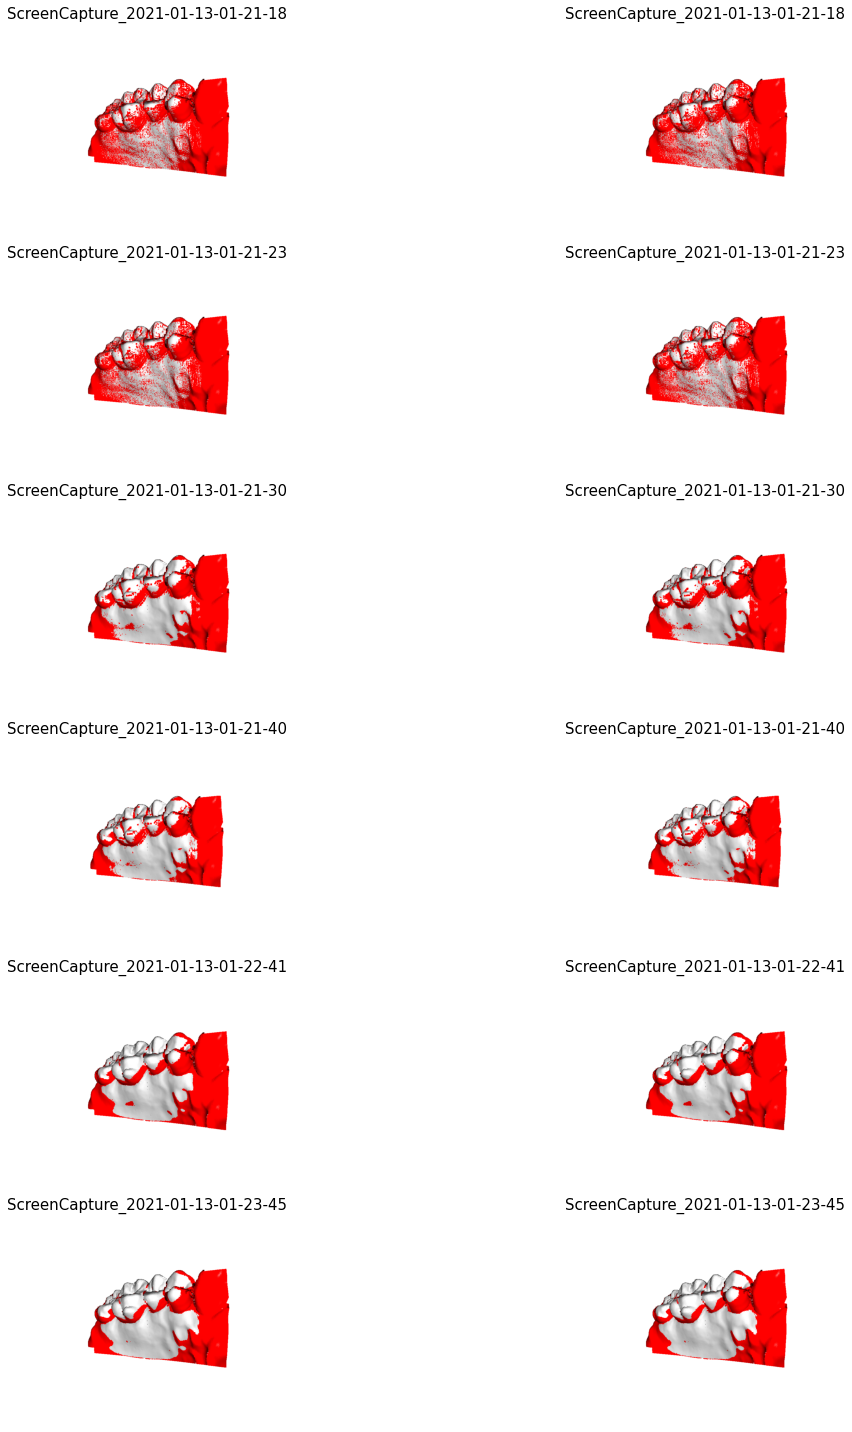

In [8]:
paths_temp = last_n_files_containing("ScreenCapture",n= myn, extension = '.png')
img_temp = [cv2.imread(path) for path in paths_temp]

rows = myn
cols = 2
fig, axes = plt.subplots(nrows=rows,ncols=cols,squeeze=False,figsize=(20, 20))
for i in range(rows):
    for j in range(cols):
        axes[i][j].imshow(plt_format(img_temp[i]))
        axes[i][j].set_title(paths_temp[i][2:-4],fontsize = 15)
        axes[i][j].axis('off')

fig.tight_layout()    
plt.show()